# Queues

They are also similar to stacks, except they follow a FIFO approach (First in First Out).

#### *First In, First Out*

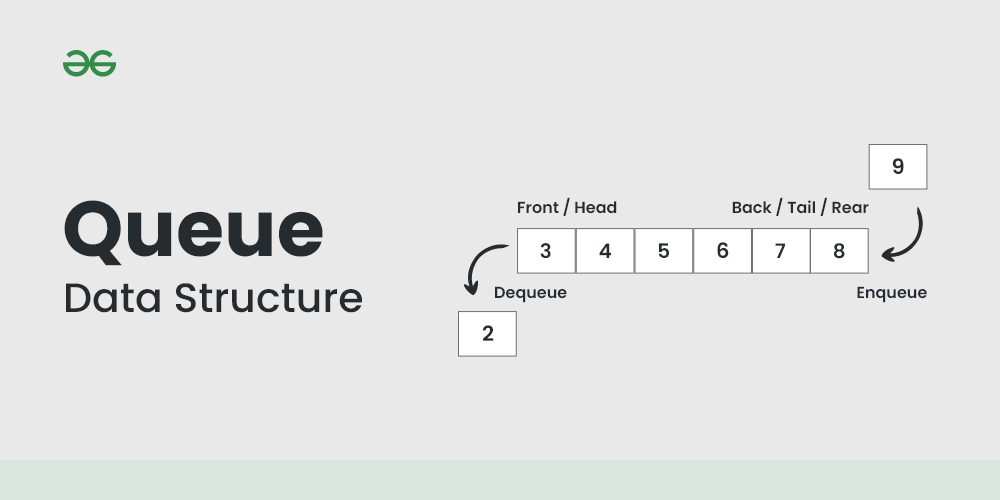

---
## Implementations and Operations

easiest way to implement a queue is using linked lists

> possible to use dynamic array for queue, but not ideal

### Enqueue

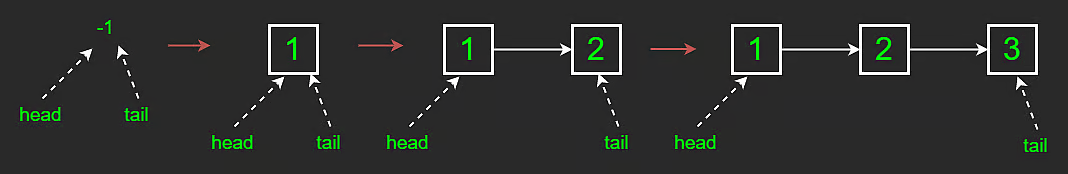

The enqueue operation inserts an element to the end of the queue. *Add to tail basically.* If we implement this operation with a singly linked list it runs in O(1) time.

```python
def enqueue(self, val):
    #for this implementation, no dummy left/right nodes
    newNode = ListNode(val)

    # Queue is non-empty
    if self.right:
        self.right.next = newNode
        self.right = self.right.next
    # Queue is empty
    else:
        self.left = self.right = newNode
```

### Dequeue

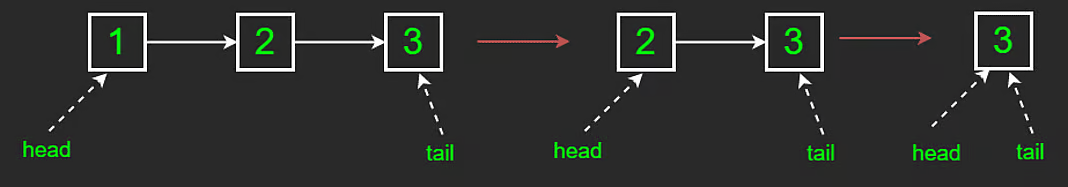

Dequeue *removes elem from head* and reutrns that elem

```python
def dequeue(self):
    # Queue is empty
    if not self.left:
        return None
    
    # Remove left node and return value
    val = self.left.val
    self.left = self.left.next
    if not self.left:
        self.right = None
    return val
```

similar to stacks, good measure to check if the queue is empty before performing the dequeue opeartion.

One of the most important use cases for the queue is when performing breadth-first search for trees and graphs.

---
## Time Complexity

| Operation | Big-O Time Complexity |
|:-|:-|
| Enqueue | O(1) |
| Dequeue | O(1) |

## Problem: Implement a double-ended queue (like a double ended stack) - this is a deque

In [8]:
#my solution
class Deque:
    
    def __init__(self):
        self.left=ListNode(-1)
        self.right=ListNode(-1)
        self.left.next=self.right
        self.right.prev=self.left

    def isEmpty(self) -> bool:
        return True if self.left.next==self.right else False

    def append(self, value: int) -> None:
        node, prev, next = ListNode(value), self.right.prev, self.right
        node.next=next
        node.prev=prev
        next.prev=node
        prev.next=node

    def appendleft(self, value: int) -> None:
        node, prev, next = ListNode(value), self.left, self.left.next
        node.next=next
        node.prev=prev
        next.prev=node
        prev.next=node

    def pop(self) -> int:
        if self.isEmpty():
            return -1
        else:
            ret=self.right.prev.val

            prev, next = self.right.prev.prev, self.right
            prev.next=next
            next.prev=prev
            return ret


    def popleft(self) -> int:
        if self.isEmpty():
            return -1
        else:
            ret=self.left.next.val

            prev, next = self.left, self.left.next.next
            prev.next=next
            next.prev=prev
            return ret
    
    def view(self):
        l=[]
        cur=self.left.next
        while cur.next:
            l.append(cur.val)
            cur=cur.next
        return l



class ListNode:
    def __init__(self, val, next=None, prev=None):
        self.val=val
        self.next=next
        self.prev=prev

In [14]:
# Doubly Linked List Node
# their implementation

class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.prev = None

# Linked List implementation of Double Ended Queue
class Deque:
    def __init__(self):
        # Create two dummy nodes and link them
        self.head = Node(-1)
        self.tail = Node(-1)
        self.head.next = self.tail
        self.tail.prev = self.head

    def isEmpty(self) -> bool:
        return self.head.next == self.tail

    def append(self, value) -> None:
        new_node = Node(value)
        last_node = self.tail.prev

        last_node.next = new_node
        new_node.prev = last_node
        new_node.next = self.tail
        self.tail.prev = new_node

    def appendleft(self, value) -> None:
        new_node = Node(value)
        first_node = self.head.next

        self.head.next = new_node
        new_node.prev = self.head
        new_node.next = first_node
        first_node.prev = new_node

    def pop(self) -> int:
        if self.isEmpty():
            return -1
        last_node = self.tail.prev
        value = last_node.value
        prev_node = last_node.prev

        prev_node.next = self.tail
        self.tail.prev = prev_node

        return value

    def popleft(self) -> int:
        if self.isEmpty():
            return -1
        first_node = self.head.next
        value = first_node.value
        next_node = first_node.next

        self.head.next = next_node
        next_node.prev = self.head

        return value

    def view(self):
        l=[]
        cur=self.head.next
        while cur.next:
            l.append(cur.value)
            cur=cur.next
        return l


In [15]:
deque = Deque()
print(deque.isEmpty())
deque.append(10)
print(deque.view())
print(deque.isEmpty())
deque.appendleft(20)
print(deque.view())
print(deque.popleft())
print(deque.view())
print(deque.pop())
print(deque.view())
print(deque.pop())
print(deque.view())
deque.append(30)
print(deque.pop())
print(deque.isEmpty())

True
[10]
False
[20, 10]
20
[10]
10
[]
-1
[]
30
True


In [16]:

import collections

## Problem: Number of students unable to eat lunch

https://leetcode.com/problems/number-of-students-unable-to-eat-lunch/description/

In [ ]:
#mysol
from typing import List
def countStudents( students: List[int], sandwiches: List[int]) -> int:
    #counter to track how many iterations after last removal
    #increases by 1 after every unsuccess
    #if this counter reaches the current length list, then we know unsuccess for sure
    i=0
    while i<len(students):
        if students[0]==sandwiches[0]:
            students.pop(0)
            sandwiches.pop(0)
            i=0
        else:
            students.append(students.pop(0))
            i+=1
    return(len(students))

In [17]:
'''
Count students' preference of food to count
Now we iterate the food one by one,
and see if any one in the left students queue will take it.

We stop at sandwiches[k] if no one wants it,
then n - k students are unable to eat.

from collections import Counter
c = Counter(['apple', 'banana', 'apple', 'cherry'])
print(c)  # Counter({'apple': 2, 'banana': 1, 'cherry': 1})
'''
def countStudents(A, B):
    count = collections.Counter(A)
    n, k = len(A), 0
    while k < n and count[B[k]]:
        count[B[k]] -= 1
        k += 1
    return n - k

## Problem: Implement a stack using a queue

https://leetcode.com/problems/implement-stack-using-queues

In [18]:
#their solution, very similar to mine YAY
class Stack:

    def __init__(self):
        self._queue = collections.deque()

    def push(self, x):
        q = self._queue
        q.append(x)
        for _ in range(len(q) - 1):
            q.append(q.popleft())
        
    def pop(self):
        return self._queue.popleft()

    def top(self):
        return self._queue[0]
    
    def empty(self):
        return not len(self._queue)